# Data Augmentation and saving in different argument

In [12]:
import os
import numpy as np
from concurrent.futures import ThreadPoolExecutor

def augment_landmarks(landmarks, num_augmentations=100, max_noise=0.05, max_shift=2.0, max_scale=0.05, max_rotation=5.0):
    augmented_data = []

    for _ in range(num_augmentations):
        # Add small random noise
        noisy_landmarks = landmarks + np.random.normal(0, max_noise, landmarks.shape)

        # Apply scaling
        scale_factor = np.random.uniform(1 - max_scale, 1 + max_scale)
        scaled_landmarks = noisy_landmarks * scale_factor

        # Apply rotation around Z-axis if landmarks have (x, y, z) format
        if scaled_landmarks.shape[1] % 3 == 0:
            num_landmarks = scaled_landmarks.shape[1] // 3
            rotated_landmarks = scaled_landmarks.copy()
            angle = np.radians(np.random.uniform(-max_rotation, max_rotation))
            cos_val, sin_val = np.cos(angle), np.sin(angle)

            for i in range(num_landmarks):
                x = scaled_landmarks[:, i * 3]
                y = scaled_landmarks[:, i * 3 + 1]
                
                # Rotate x and y
                rotated_x = cos_val * x - sin_val * y
                rotated_y = sin_val * x + cos_val * y

                rotated_landmarks[:, i * 3] = rotated_x
                rotated_landmarks[:, i * 3 + 1] = rotated_y
        else:
            rotated_landmarks = scaled_landmarks

        # Apply shift
        shift = np.random.uniform(-max_shift, max_shift, rotated_landmarks.shape[1])
        shifted_landmarks = rotated_landmarks + shift

        # Append the final augmented data
        augmented_data.append(shifted_landmarks)
        print("Augmented array shape:", shifted_landmarks.shape)

    return augmented_data

def process_file(folder_name, file_name):
    # Load original landmarks
    file_path = os.path.join(data_dir, folder_name, file_name)
    landmarks = np.load(file_path)

    # Save the original landmarks to the augmented directory
    augmented_folder_path = os.path.join(augmented_dir, folder_name)
    os.makedirs(augmented_folder_path, exist_ok=True)
    original_file_path = os.path.join(augmented_folder_path, f"{file_name.split('.')[0]}.npy")
    np.save(original_file_path, landmarks)
    print(f"Saved original: {original_file_path}")
    
    # Generate augmentations
    augmented_landmarks_list = augment_landmarks(landmarks)
    
    # Save each augmented array
    for i, augmented_landmarks in enumerate(augmented_landmarks_list):
        augmented_file_path = os.path.join(augmented_folder_path, f"{file_name.split('.')[0]}_aug{i+1}.npy")
        np.save(augmented_file_path, augmented_landmarks)
        print(f"Saved: {augmented_file_path}")

# Paths
data_dir = 'New Folder'           # Directory where original landmarks are saved
augmented_dir = 'Augmented_Combined'      # Directory where augmented data will be saved

# Ensure augmented directory exists
os.makedirs(augmented_dir, exist_ok=True)

# Use ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor(max_workers=4) as executor:
    # Iterate through each folder and submit tasks
    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.npy'):
                    # Submit each file processing as a separate task
                    executor.submit(process_file, folder_name, file_name)

print("Data augmentation completed and saved in", augmented_dir)


Saved original: Augmented_Combined\A\combined_landmarks.npy
Saved original: Augmented_Combined\Absent\combined_landmarks.npy
Saved original: Augmented_Combined\Actor\combined_landmarks.npy
Saved original: Augmented_Combined\Actress\combined_landmarks.npy
Augmented array shape: (105, 1530)
Augmented array shape: (90, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (120, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (90, 1530)
Augmented array shape: (120, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (120, 1530)
Augmented array shape: (90, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (90, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (120, 1530)
Augmented array shape: (105, 1530)
Augmented array shape: (90, 1530)
Augmented array shape: (120, 1530)
Augmented array shape: (105, 1530)
Augmented array

##### Each array should be padded and masked then feed to model.

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from sklearn.preprocessing import LabelEncoder

# Parameters
data_dir = 'Augmented_Combined'  # Directory where reshaped landmarks are saved

# Data storage lists
X_data = []
y_labels = []

num_of_frame=[]

verify_data=[]
verify_label=[]
# Load data and labels
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name  # Use the folder name as the label
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.npy'):
                file_path = os.path.join(folder_path, file_name)
                print(file_path, label)
                # Load the .npy file and verify its shape
                data = np.load(file_path)
                num_of_frame.append(len(data))
                verify_data.append(data[0])             # Append landmark data
                verify_label.append(label)          # Append corresponding label
                
                X_data.append(data)             # Append landmark data
                y_labels.append(label)          # Append corresponding label



Augmented_Combined\A\combined_landmarks.npy A
Augmented_Combined\A\combined_landmarks_aug1.npy A
Augmented_Combined\A\combined_landmarks_aug10.npy A
Augmented_Combined\A\combined_landmarks_aug100.npy A
Augmented_Combined\A\combined_landmarks_aug11.npy A
Augmented_Combined\A\combined_landmarks_aug12.npy A
Augmented_Combined\A\combined_landmarks_aug13.npy A
Augmented_Combined\A\combined_landmarks_aug14.npy A
Augmented_Combined\A\combined_landmarks_aug15.npy A
Augmented_Combined\A\combined_landmarks_aug16.npy A
Augmented_Combined\A\combined_landmarks_aug17.npy A
Augmented_Combined\A\combined_landmarks_aug18.npy A
Augmented_Combined\A\combined_landmarks_aug19.npy A
Augmented_Combined\A\combined_landmarks_aug2.npy A
Augmented_Combined\A\combined_landmarks_aug20.npy A
Augmented_Combined\A\combined_landmarks_aug21.npy A
Augmented_Combined\A\combined_landmarks_aug22.npy A
Augmented_Combined\A\combined_landmarks_aug23.npy A
Augmented_Combined\A\combined_landmarks_aug24.npy A
Augmented_Combined\

KeyboardInterrupt: 

In [2]:
X_data[0].shape

(90, 1530)

In [3]:
verify_data[0]

array([ 4.88428563e-01,  2.77603507e-01, -1.67188179e-02, ...,
        6.24120653e-01,  8.30893517e-01, -8.75710102e-05])

In [4]:
verify_label[0]

'A'

Verfied labels are associated with its data. ✅✅✅✅✅✅✅✅

In [5]:
path='Augmented_Combined/A/combined_landmarks_aug1.npy'
data = np.load(path)
print(data[0]) 

[-0.32987926 -0.03000856 -1.50507182 ...  2.00196831  1.79627162
  1.41979612]


In [6]:
max(num_of_frame)

165

In [7]:
len(X_data)

1919

In [8]:
len(y_labels)

1919

Padding and encoding labels (Training)

In [7]:
from sklearn.preprocessing import MinMaxScaler

max_timesteps = max(num_of_frame)   # Set to the max frames found in your data for padding
n_features = 1530                   # Number of features per frame
#n_classes =  len(X_data)            # Update this according to the total unique labels
batch_size=32

# 1. Normalize the sequences consistently across training data
scaler = MinMaxScaler()

# Flatten the sequences for scaling, then reshape after scaling
X_data_flattened = np.concatenate(X_data, axis=0)  # Flatten all frames in X_data
X_data_scaled = scaler.fit_transform(X_data_flattened)  # Fit scaler on flattened data

# Split back into individual sequences
X_data_normalized = []
idx = 0
for sequence in X_data:
    seq_len = len(sequence)
    X_data_normalized.append(X_data_scaled[idx:idx + seq_len])
    idx += seq_len


# Pad sequences
X_padded = pad_sequences(X_data_normalized, maxlen=max_timesteps, dtype='float32', padding='post')

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

#Save the label encoder classes as a numpy file
np.save('label_classes.npy', label_encoder.classes_)

# To check the shape of y_categorical
print("Shape of one-hot encoded labels:", y_categorical.shape)
print("Number of classes:", len(label_encoder.classes_))


print(X_padded.shape)
print(y_categorical.shape)


KeyboardInterrupt: 

##### Importing packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import shutil

In [14]:
# Directory to store the removed .npy files
removed_dir = 'validation'
os.makedirs(removed_dir, exist_ok=True)
data_dir='Augmented_Combined'

# Efficient loading and preprocessing
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        
        # Load and normalize each file for the folder
        for file_name in os.listdir(folder_path):
            if file_name in ['combined_landmarks.npy', 
                             'combined_landmarks_aug1.npy', 
                             'combined_landmarks_aug2.npy', 
                             'combined_landmarks_aug3.npy', 
                             'combined_landmarks_aug4.npy', 
                             'combined_landmarks_aug5.npy']:
                file_path = os.path.join(folder_path, file_name)
                val_folder_path = os.path.join(removed_dir, folder_name)
                os.makedirs(val_folder_path, exist_ok=True)
                shutil.move(file_path,val_folder_path)

                # Move the file to the removed directory
                print(f"Moved {file_name} to {val_folder_path}.")
                


Moved combined_landmarks.npy to validation\A.
Moved combined_landmarks_aug1.npy to validation\A.
Moved combined_landmarks_aug2.npy to validation\A.
Moved combined_landmarks_aug3.npy to validation\A.
Moved combined_landmarks_aug4.npy to validation\A.
Moved combined_landmarks_aug5.npy to validation\A.
Moved combined_landmarks.npy to validation\Absent.
Moved combined_landmarks_aug1.npy to validation\Absent.
Moved combined_landmarks_aug2.npy to validation\Absent.
Moved combined_landmarks_aug3.npy to validation\Absent.
Moved combined_landmarks_aug4.npy to validation\Absent.
Moved combined_landmarks_aug5.npy to validation\Absent.
Moved combined_landmarks.npy to validation\Actor.
Moved combined_landmarks_aug1.npy to validation\Actor.
Moved combined_landmarks_aug2.npy to validation\Actor.
Moved combined_landmarks_aug3.npy to validation\Actor.
Moved combined_landmarks_aug4.npy to validation\Actor.
Moved combined_landmarks_aug5.npy to validation\Actor.
Moved combined_landmarks.npy to validation\

In [2]:
# Parameters
data_dir = 'Augmented_Combined'  # Directory where reshaped landmarks are saved
n_features = 1530    # Number of features per frame

# Data storage lists
X_data = []
y_labels = []

num_of_frame=[]


# Initialize scaler and label encoder
scaler = MinMaxScaler()
label_encoder = LabelEncoder()

# Load data and labels
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name  # Use the folder name as the label
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.npy'):
                file_path = os.path.join(folder_path, file_name)
                
                # Load the .npy file and verify its shape
                data = np.load(file_path)
                num_of_frame.append(len(data))

                # Normalize the sequence
                data_scaled = scaler.fit_transform(data.reshape(-1, n_features))  # Reshape for scaling
                X_data.append(data_scaled.reshape(data.shape))  # Restore original shape after scaling
                y_labels.append(label)          # Append corresponding label

# Pad sequences to ensure uniform length
max_timesteps = max(num_of_frame)  # Set this to a fixed value
X_padded = pad_sequences(X_data, maxlen=max_timesteps, dtype='float32', padding='post')

# Encode labels to integers
y_encoded = label_encoder.fit_transform(y_labels)
y_categorical = to_categorical(y_encoded, num_classes=len(label_encoder.classes_))

# Save label encoder classes for future use
np.save('label_classes.npy', label_encoder.classes_)

# Output information
print(f"Shape of padded X data: {X_padded.shape}")
print(f"Shape of one-hot encoded labels: {y_categorical.shape}")
print(f"Number of classes: {len(label_encoder.classes_)}")


Shape of padded X data: (1995, 135, 1530)
Shape of one-hot encoded labels: (1995, 21)
Number of classes: 21


###### Validation Parameters

In [3]:
# Parameters
#max_timesteps = max(num_of_frame)  # Set this to a fixed value
n_features = 1530    # Number of features per frame

# Data storage lists
val_X_data = []
val_y_labels = []

# Initialize scaler and label encoder
val_scaler = MinMaxScaler()
val_label_encoder = LabelEncoder()

# Efficient loading and preprocessing
for folder_name in os.listdir('validation'):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name  # Use the folder name as the label
        
        # Load and normalize each file for the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            data = np.load(file_path)
            # Normalize the sequence
            data_scaled = val_scaler.fit_transform(data.reshape(-1, n_features))  # Reshape for scaling
            val_X_data.append(data_scaled.reshape(data.shape))  # Restore original shape after scaling
            val_y_labels.append(label)          # Append corresponding label

# Pad sequences to ensure uniform length
val_X_padded = pad_sequences(val_X_data, maxlen=max_timesteps, dtype='float32', padding='post')

# Encode labels to integers
val_y_encoded = val_label_encoder.fit_transform(val_y_labels)
val_y_categorical = to_categorical(val_y_encoded, num_classes=len(val_label_encoder.classes_))

# Save label encoder classes for future use
np.save('val_label_classes.npy', val_label_encoder.classes_)

# Output information
print(f"Shape of padded X data: {val_X_padded.shape}")
print(f"Shape of one-hot encoded labels: {val_y_categorical.shape}")
print(f"Number of classes: {len(val_label_encoder.classes_)}")


Shape of padded X data: (1995, 135, 1530)
Shape of one-hot encoded labels: (1995, 21)
Number of classes: 21


In [4]:
len(X_padded[0])

135

# Training lstm

In [5]:
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(max_timesteps, n_features)))
model.add(LSTM(32, activation='tanh', return_sequences=True, dropout=0.3, recurrent_dropout=0.3, kernel_regularizer=l2(0.01)))  # recurrent_dropout to stabilize training
model.add(BatchNormalization())  # Batch normalization for stabilized gradients
model.add(LSTM(64, kernel_regularizer=l2(0.02), activation='tanh'))  # Final LSTM without return_sequences
model.add(Dropout(0.3))
model.add(BatchNormalization())  # Batch normalization for stabilized gradients
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))


model.summary()

C:\Users\Shadab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 135, 1530)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 135, 32)             │         200,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 135, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │           1,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,805 (901.58 KB)

 Trainable params: 230,613 (900.83 KB)

 Non-trainable params: 192 (768.00 B)

In [6]:
# Configure optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.001)  # Reduced learning rate 
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Configure early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Train the model with validation data
history = model.fit(X_padded, y_categorical, epochs=10, batch_size=32, validation_data=(val_X_padded, val_y_categorical), callbacks=[early_stopping])

# Save the model
model.save('lstm_model.h5')

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 178ms/step - categorical_accuracy: 0.0422 - loss: 8.1367 - val_categorical_accuracy: 0.0476 - val_loss: 6.7169
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - categorical_accuracy: 0.1247 - loss: 6.3837 - val_categorical_accuracy: 0.0952 - val_loss: 5.7646
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - categorical_accuracy: 0.1822 - loss: 5.1826 - val_categorical_accuracy: 0.1794 - val_loss: 4.8980
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - categorical_accuracy: 0.2490 - loss: 4.3533 - val_categorical_accuracy: 0.2586 - val_loss: 4.1875
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - categorical_accuracy: 0.3486 - loss: 3.5652 - val_categorical_accuracy: 0.4832 - val_loss: 3.7118
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - categorical_accuracy: 0.4808 - loss: 2.9739 - val_categorical_accuracy: 0.5058 - val_loss: 3.0975
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - categorical_accuracy: 0.5798 - l

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step


C:\Users\Shadab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shadab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shadab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

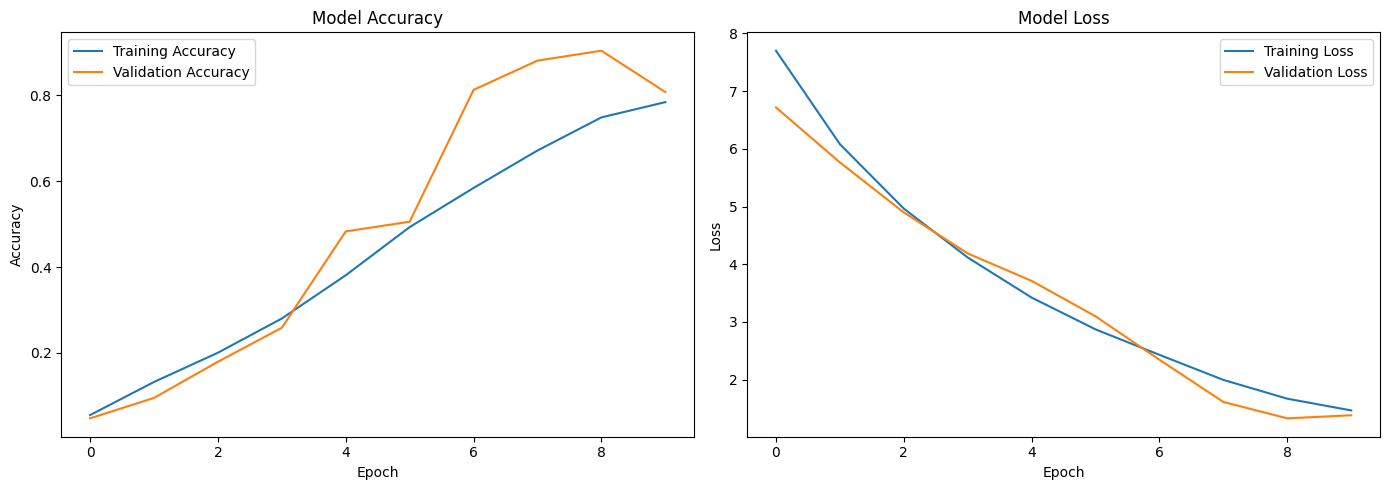

In [7]:
# Generate the classification report and confusion matrix
val_predictions = model.predict(val_X_padded)
y_pred_val = np.argmax(val_predictions, axis=1)
y_true_val = np.argmax(val_y_categorical, axis=1)

# Classification report
report = classification_report(y_true_val, y_pred_val, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion matrix
cm = confusion_matrix(y_true_val, y_pred_val)

# Plotting training & validation accuracy values
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

Testing the model

In [8]:
# Parameters
max_timesteps = 165                         # The same max_timesteps used in training
n_features = 1530                           # Number of features per frame
model_path = 'lstm_model.h5'                # Path to your trained model
label_encoder_path = 'label_classes.npy'    # Path to your label encoder classes array

# Load the trained model
model = load_model(model_path)

# Load label classes array (saved during training)
label_classes = np.load(label_encoder_path)  # Ensure it loads correctly as an array of class labels

# Load your landmarks numpy array (example path)
landmark_sequence = np.load('Reshaped_combined/A/combined_landmarks.npy')  # Replace with the actual path to your landmarks file

print("Original Landmark Sequence Shape:", landmark_sequence.shape)

# Check if the landmarks array has the correct feature dimension
if landmark_sequence.shape[1] != n_features:
    raise ValueError(f"Expected landmark array with {n_features} features per frame, got {landmark_sequence.shape[1]}")

# Normalize each frame in the sequence individually
scaler = MinMaxScaler()
test_data_scaled = scaler.fit_transform(landmark_sequence.reshape(-1, n_features))  # Reshape for scaling
test_data_scaled.reshape(landmark_sequence.shape)  # Restore original shape after scaling

# Pad or truncate the sequence to match max_timesteps
input_sequence = pad_sequences([test_data_scaled], maxlen=max_timesteps, dtype='float32', padding='post', truncating='post')
input_sequence = np.reshape(input_sequence, (1, max_timesteps, n_features))  # Reshape for model input

print("Input Sequence Shape for Prediction:", input_sequence.shape)

# Make prediction
prediction = model.predict(input_sequence)
predicted_class_index = np.argmax(prediction, axis=1)[0]
print("Prediction Output:", prediction)
print("Predicted Class Index:", predicted_class_index)

# Retrieve the predicted label using label_classes array
predicted_label = label_classes[predicted_class_index]

# Display the predicted label
print(f'Predicted Label: {predicted_label}')


Original Landmark Sequence Shape: (90, 1530)
Input Sequence Shape for Prediction: (1, 165, 1530)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step
Prediction Output: [[1.94360066e-04 6.70220703e-03 8.88481329e-04 7.57698016e-03
  1.62841717e-03 3.33075674e-04 2.98971689e-04 9.30802606e-04
  7.43368117e-04 2.55548512e-04 1.02092308e-04 8.50293145e-05
  6.74655166e-05 2.41519538e-05 3.32991214e-04 9.79587317e-01
  1.09183755e-04 2.56523108e-05 2.93254088e-05 1.21851317e-05
  7.24277852e-05]]
Predicted Class Index: 15
Predicted Label: Enemy


#### Other

In [30]:
a=np.load(r"C:\Users\Shadab\Downloads\webcam_landmarks\all_frames_landmarks_reshaped.npy")
a.shape

(71, 1530)

In [22]:
import cv2
import mediapipe as mp
import numpy as np
import os
import time  # Import time module to handle the timer

# Initialize Mediapipe modules
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands

def extract_landmarks(frame, face_mesh, hands):
    """
    Extract face and hand landmarks from a frame.
    
    Args:
    frame (np.ndarray): Image frame from which to extract landmarks.
    face_mesh: Mediapipe FaceMesh object.
    hands: Mediapipe Hands object.
    
    Returns:
    np.ndarray: Combined face and hand landmarks as a single array.
    """
    # Placeholders for landmarks
    face_landmarks = np.zeros((468, 3))  # 468 landmarks for face
    hand_landmarks_combined = np.zeros((42, 3))  # 21 landmarks per hand (2 hands)

    # Convert the frame to RGB 
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    rgb_frame.flags.writeable = False

    # Detect face landmarks
    face_results = face_mesh.process(rgb_frame)
    if face_results.multi_face_landmarks:
        face_landmarks = np.array([[lm.x, lm.y, lm.z] for lm in face_results.multi_face_landmarks[0].landmark])

    # Detect hand landmarks
    hand_results = hands.process(rgb_frame)
    if hand_results.multi_hand_landmarks:
        for idx, hand_landmark in enumerate(hand_results.multi_hand_landmarks):
            start_index = idx * 21  # Determine whether it's the first or second hand
            for i, lm in enumerate(hand_landmark.landmark):
                hand_landmarks_combined[start_index + i] = [lm.x, lm.y, lm.z]

    # Combine face and hand landmarks into a single array
    combined_landmarks = np.vstack([face_landmarks, hand_landmarks_combined])
    return combined_landmarks

def process_webcam(output_directory, capture_duration=5):
    """
    Capture video from the webcam and process it frame by frame to extract combined face and hand landmarks.
    Stops after a specified duration (in seconds).
    
    Args:
    output_directory (str): Directory to save extracted landmarks as NumPy arrays.
    capture_duration (int): Duration in seconds to capture video.
    """
    with mp_face_mesh.FaceMesh(max_num_faces=1) as face_mesh, mp_hands.Hands(max_num_hands=2) as hands:
        cap = cv2.VideoCapture(0)  # Open webcam (0 for default camera)

        if not cap.isOpened():
            print("Error: Unable to access the webcam.")
            return

        os.makedirs(output_directory, exist_ok=True)
        frame_count = 0

        start_time = time.time()  # Record the start time

        print(f"Capturing video for {capture_duration} seconds...")

        all_frames_landmarks = []  # List to store all frames' landmarks

        while True:
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame from webcam. Exiting...")
                break

            frame_count += 1

            # Extract combined landmarks
            combined_landmarks = extract_landmarks(frame, face_mesh, hands)

            # Append the landmarks of the current frame to the list
            all_frames_landmarks.append(combined_landmarks)

            # Check if the specified capture duration has passed
            if time.time() - start_time >= capture_duration:
                print(f"Capture duration of {capture_duration} seconds reached.")
                break

        # Convert the list of all frames' landmarks to a single NumPy array
        all_frames_landmarks_array = np.array(all_frames_landmarks)

        # Reshape the data into 2D (num_frames, num_landmarks * 3)
        num_frames = all_frames_landmarks_array.shape[0]
        reshaped_landmarks = all_frames_landmarks_array.reshape(num_frames, -1)

        # Save the reshaped combined landmarks as a NumPy array (one file for all frames)
        np.save(os.path.join(output_directory, "all_frames_landmarks_reshaped.npy"), reshaped_landmarks)
        print(f"All frames' reshaped landmarks saved to 'all_frames_landmarks_reshaped.npy'.")

        cap.release()
        print("Resources released.")

# Output directory for landmarks
output_directory = "webcam_landmarks"

# Process video feed from webcam for 5 seconds and save reshaped landmarks in one NumPy array
process_webcam(output_directory, capture_duration=5)


Capturing video for 5 seconds...


C:\Users\Shadab\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Capture duration of 5 seconds reached.
All frames' reshaped landmarks saved to 'all_frames_landmarks_reshaped.npy'.
Resources released.
